In [1]:
import numpy as np
import pandas as pd


In [2]:


!pip install google-play-scraper


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 1.7 MB/s eta 0:00:00


In [3]:
from google_play_scraper import app, reviews_all

# This will result in Json format, we'll make a dataframe
result = reviews_all('com.policybazaar')


In [4]:
df = pd.json_normalize(result)

- Cols "reviewId,userName, userImage, at, repliedAt, reviewCreatedVersion" are not so important, Droping them.

In [5]:
df.drop(columns=['reviewId', 'userName', 'userImage', 'at', 'repliedAt', 'reviewCreatedVersion'], inplace=True)

In [6]:
df.shape

(70605, 5)

- Data contains more than 70000 rows, moving ahead with that much data will take a lot of time so taking just 2000 samples to get sentiment.


In [7]:
df = df.sample(2000)

### Will contain only those rows having english texts

In [8]:
pip install langdetect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 14.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993222 sha256=ac4f6da29500bf6609b5a4785b453a4b279cd4819d60390f907faf32afa9eb43
  Stored in directory: /root/.cache/pip/wheels/0a/f2/b2/e5ca405801e05eb7c8ed5b3b4bcf1fcabcd6272c167640072e
Successfully built langdetect


In [9]:
# Function to check if a sentence is in English
from langdetect import detect

def is_english(text):
    try:
        return detect(text) == 'en'
    except:
        return False  # Handle cases where detection might fail

# Filter only English sentences
df = df[df['content'].apply(is_english)]

## Sentiment analysis of reviews

In [10]:
from transformers import pipeline

- We'll be using 'siebert/sentiment-roberta-large-english' model and the model has a maximum sequence length of 512 tokens.
- Filter rows where the word count in the content column is between 5 and 512.

In [11]:
# Function to count words
def word_count(text):
    return len(str(text).split())

# Filter rows with less than 512 words
df = df[df['content'].apply(lambda x: 5 <= word_count(x) <= 511)]

In [12]:
sentiment_analysis = pipeline('sentiment-analysis', model='siebert/sentiment-roberta-large-english')

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/687 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.42G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.42G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/256 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

Device set to use cpu


In [13]:
# Taking example of a sentence. It results in format of dictionary in which we have to extract 'lable'.
sentiment_analysis("worthy application")[0]

{'label': 'POSITIVE', 'score': 0.9983617663383484}

In [14]:
df['content'] = df['content'].astype('str')

In [15]:
df['result'] = df['content'].apply(lambda x: sentiment_analysis(x))

In [16]:
df['result'] = df['result'].apply(lambda x: x[0]['label'])

In [17]:
df

,content,score,thumbsUpCount,replyContent,appVersion,result
25508,take too much time to upload,4,0,None,4.2.4,NEGATIVE
59425,I was applied one policy on Friday morning. In...,2,1,None,3.1.3,NEGATIVE
66170,Made me fool after taking of payment for my ca...,1,0,"Hi Akash,\n\nWe are sorry for the inconvenien...",2.0.5,NEGATIVE
50286,Nice application to compare the required insur...,5,4,"Hi, thank you for your positive feedback. Furt...",3.3.2,NEGATIVE
3228,The worst possible app for buying insurance.. ...,1,38,"Hi Ajith, please allow us to look into this an...",5.2.0,NEGATIVE
...,...,...,...,...,...,...
26118,Nice App useful to customer,5,0,None,4.2.4,POSITIVE
68571,way too excellent resource for tax price savin...,5,0,None,1.1.1,POSITIVE
18416,Excellent service providers.. Very much Apprec...,5,0,None,5.0.3,POSITIVE
14723,Very prompt and flexible. Thanks Policy Bazar.,5,2,None,5.0.5,POSITIVE


In [24]:
# Save to CSV
# df.to_csv("policybazaar_review.csv", index=False)

##  Vizualizations



In [19]:
df

,content,score,thumbsUpCount,replyContent,appVersion,result
25508,take too much time to upload,4,0,None,4.2.4,NEGATIVE
59425,I was applied one policy on Friday morning. In...,2,1,None,3.1.3,NEGATIVE
66170,Made me fool after taking of payment for my ca...,1,0,"Hi Akash,\n\nWe are sorry for the inconvenien...",2.0.5,NEGATIVE
50286,Nice application to compare the required insur...,5,4,"Hi, thank you for your positive feedback. Furt...",3.3.2,NEGATIVE
3228,The worst possible app for buying insurance.. ...,1,38,"Hi Ajith, please allow us to look into this an...",5.2.0,NEGATIVE
...,...,...,...,...,...,...
26118,Nice App useful to customer,5,0,None,4.2.4,POSITIVE
68571,way too excellent resource for tax price savin...,5,0,None,1.1.1,POSITIVE
18416,Excellent service providers.. Very much Apprec...,5,0,None,5.0.3,POSITIVE
14723,Very prompt and flexible. Thanks Policy Bazar.,5,2,None,5.0.5,POSITIVE


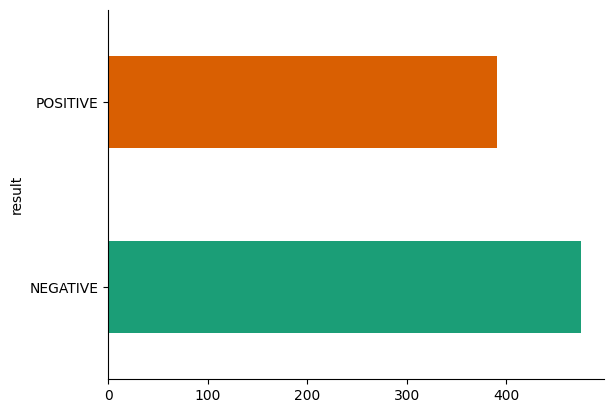

In [20]:
# result

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('result').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

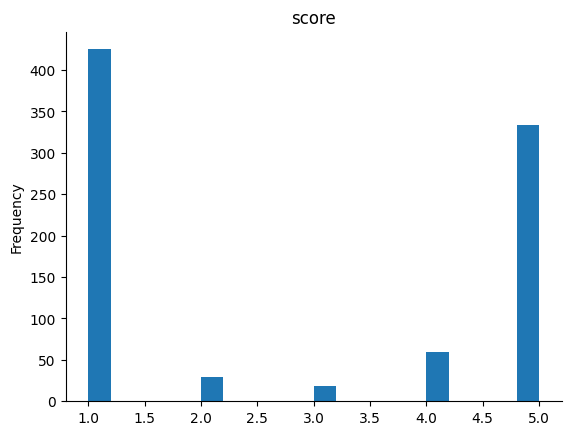

In [21]:
# score

from matplotlib import pyplot as plt
df['score'].plot(kind='hist', bins=20, title='score')
plt.gca().spines[['top', 'right',]].set_visible(False)

<ipython-input-22-ff93bc99340c>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df, x='score', y='result', inner='box', palette='Dark2')


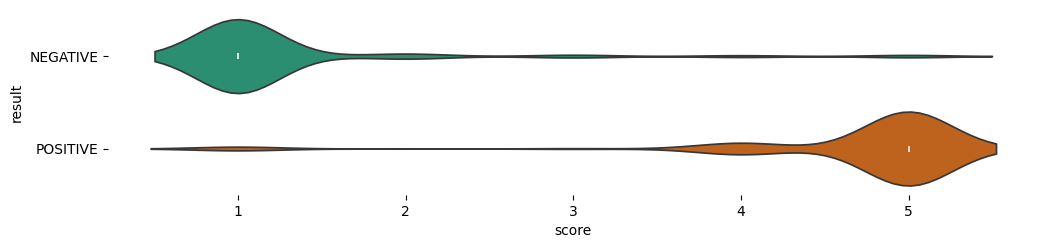

In [22]:
# result vs score

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['result'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='score', y='result', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [23]:
df

,content,score,thumbsUpCount,replyContent,appVersion,result
25508,take too much time to upload,4,0,None,4.2.4,NEGATIVE
59425,I was applied one policy on Friday morning. In...,2,1,None,3.1.3,NEGATIVE
66170,Made me fool after taking of payment for my ca...,1,0,"Hi Akash,\n\nWe are sorry for the inconvenien...",2.0.5,NEGATIVE
50286,Nice application to compare the required insur...,5,4,"Hi, thank you for your positive feedback. Furt...",3.3.2,NEGATIVE
3228,The worst possible app for buying insurance.. ...,1,38,"Hi Ajith, please allow us to look into this an...",5.2.0,NEGATIVE
...,...,...,...,...,...,...
26118,Nice App useful to customer,5,0,None,4.2.4,POSITIVE
68571,way too excellent resource for tax price savin...,5,0,None,1.1.1,POSITIVE
18416,Excellent service providers.. Very much Apprec...,5,0,None,5.0.3,POSITIVE
14723,Very prompt and flexible. Thanks Policy Bazar.,5,2,None,5.0.5,POSITIVE


## Performing Analysis

- We'll be using saved CSV "/content/policybazaar_review.csv for further analysis

In [25]:
data = pd.read_csv("/content/policybazaar_review.csv")

In [27]:
data.result.value_counts()

,count
result,
NEGATIVE,451
POSITIVE,380


In [33]:
pd.crosstab(data['appVersion'], data['result'])

result,NEGATIVE,POSITIVE
appVersion,,
1.0.1,1,1
1.0.3,0,2
1.0.7,1,2
1.0.8,1,2
1.1.0,0,3
1.1.1,2,26
1.1.2,1,2
2.0.1,0,1
2.0.2,2,18


,content,score,thumbsUpCount,replyContent,appVersion,result
0,Very nice and helpful app,5,0,"Hi, thank you for your positive feedback. Furt...",3.1.4,POSITIVE
1,Guys don't buy anything from these scammers. I...,1,3,"Hi Amit, my apologies for the unpleasant exper...",5.0.5,NEGATIVE
2,Policy Bazaar provides quick and hassle free s...,5,1,"Hi Tejinder, thank you for your positive feedb...",4.1.6,POSITIVE
3,My ears are bleeding now. Keep calling. I am c...,1,0,"Divyanshu, our intent is not to disturb you bu...",4.0.7,NEGATIVE
4,Policy bazaar uses unethical business practice...,1,1,"Hi Yash, please let us know what went wrong, a...",5.2.3,NEGATIVE
...,...,...,...,...,...,...
826,while vehicle inspection call... not supportive,2,0,"Hi Ravindra, please allow us an opportunity to...",NaN,NEGATIVE
827,policy bazzar is very worst don't go anyone,1,0,"Hi, we regret to note your unpleasant experien...",4.2.4,NEGATIVE
828,"Abey jhutta policy,aur kitna fake number se ca...",1,0,We are sorry for the inconvenience caused to y...,NaN,NEGATIVE
829,The prices of the policies are much cheaoer th...,5,0,NaN,4.1.6,POSITIVE
